In [ ]:
########## Facebook prohpet



#The acquisition of Twitter by Elon Musk began on April 14, 2022, 
#and concluded on October 27, 2022. 
#Business magnate Elon Musk began buying shares of American social media company Twitter, Inc. in January 2022, 
#eventually becoming the company's largest shareholder in April with a 9.1 percent ownership stake.

In [ ]:
##A great advantage compared to autoregressive models (eg. ARIMA) is that 
##Prophet doesn't require stationary time series: a trend component is generated natively. 
##For these reasons, Prophet works quite well for middle-term predictions

from prophet import Prophet
import numpy as np
import pandas as pd

from prophet.plot import plot_plotly, plot_components_plotly
from sklearn.metrics import mean_squared_error

import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.pylab import rcParams

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf


data1 = yf.download('TSLA', start="2019-11-01", end="2022-10-30")
data2 = yf.download('NIO', start="2019-11-01", end="2022-10-30")
data3 = yf.download('TWTR', start="2019-11-01", end="2022-10-30")
data4 = yf.download('Meta', start="2019-11-01", end="2022-10-30")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
df3 = pd.DataFrame(data3)
df4 = pd.DataFrame(data4)



In [ ]:
print(len(df1['2022-04-14':])) #After
print(len(df1[:'2022-04-13'])) #Before



df1[:'2022-04-13']


137
617


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,21.087999,21.098667,20.653334,20.887333,20.887333,95758500
2019-11-04,20.986668,21.462667,20.617332,21.164667,21.164667,131805000
2019-11-05,21.308001,21.567333,21.074667,21.148001,21.148001,104151000
2019-11-06,21.200001,21.781334,20.966667,21.771999,21.771999,119113500
2019-11-07,21.942667,22.766666,21.868000,22.369333,22.369333,217009500
...,...,...,...,...,...,...
2022-04-07,350.796661,358.863342,340.513336,352.420013,352.420013,79447200
2022-04-08,347.736664,349.480011,340.813324,341.829987,341.829987,55013700
2022-04-11,326.799988,336.156677,324.880005,325.309998,325.309998,59357100


In [ ]:
df1['Date']=df1.index


df1 = df1.rename(columns = {'Close': 'y','Date':'ds'})

df1['y_orig'] = df1['y'] 

df1.drop(['Open', 'High','Low','Adj Close','Volume' ], axis=1)

,y,ds,y_orig
Date,,,
2019-11-01,20.887333,2019-11-01,20.887333
2019-11-04,21.164667,2019-11-04,21.164667
2019-11-05,21.148001,2019-11-05,21.148001
2019-11-06,21.771999,2019-11-06,21.771999
2019-11-07,22.369333,2019-11-07,22.369333
...,...,...,...
2022-10-24,211.250000,2022-10-24,211.250000
2022-10-25,222.419998,2022-10-25,222.419998
2022-10-26,224.639999,2022-10-26,224.639999


In [ ]:
#split into tran/test

#Good Friday	Closed (April 15)	Closed (April 15)
#Memorial Day	Closed (May 30)	Closed (May 30)
#Juneteenth	Closed (June 20)	Closed (June 20)
#Independence Day	Closed (July 4)	Closed (July 4)
#Labor Day	Closed (Sept. 5)	Closed (Sept. 5)



train1 = df1[:'2022-04-13']
test1 = df1['2022-04-14':]

      
      
from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")     
      

prophet1 = Prophet()

prophet1.fit(train1)

future = prophet1.make_future_dataframe(periods=142, freq='B') # make prediction until 28/10/22

forecast = prophet1.predict(future)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg6cxz36s/5umysutd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpg6cxz36s/vkdmlmhy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71642', 'data', 'file=/tmp/tmpg6cxz36s/5umysutd.json', 'init=/tmp/tmpg6cxz36s/vkdmlmhy.json', 'output', 'file=/tmp/tmpg6cxz36s/prophet_modeld0sfrvdv/prophet_model-20221114033126.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:31:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:31:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
print(len(test1))



# Need to drop ('2022-05-30','2022-06-20','2022-07-04','2022-09-05') Non-Trading day from Forecast


print(forecast[forecast['ds']=='2022-05-30'].index)
print(forecast[forecast['ds']=='2022-06-20'].index)
print(forecast[forecast['ds']=='2022-07-04'].index)
print(forecast[forecast['ds']=='2022-09-05'].index)

forecast1=forecast.drop([forecast.index[649],forecast.index[664],forecast.index[674],forecast.index[719]])

forecast1

print(len(forecast1))

137
Int64Index([649], dtype='int64')
Int64Index([664], dtype='int64')
Int64Index([674], dtype='int64')
Int64Index([719], dtype='int64')
755


In [ ]:

forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].count

forecast1.count()

ds                            755
trend                         755
yhat_lower                    755
yhat_upper                    755
trend_lower                   755
trend_upper                   755
additive_terms                755
additive_terms_lower          755
additive_terms_upper          755
weekly                        755
weekly_lower                  755
weekly_upper                  755
yearly                        755
yearly_lower                  755
yearly_upper                  755
multiplicative_terms          755
multiplicative_terms_lower    755
multiplicative_terms_upper    755
yhat                          755
dtype: int64

In [ ]:


plot_plotly(prophet1,forecast1)


In [ ]:
from statsmodels.tools.eval_measures import rmse

predictions = forecast1.iloc[-137:]['yhat']


In [ ]:
from math import sqrt

rms = sqrt(mean_squared_error(test1['y'], predictions))

print('Mean Squarred Error: %.2f'% rms)

print('Mean : %.2f'%(test1['y']).mean())


#First we check the mean value of the data set which comes out to be 263.21
#And the root mean squared error for this particular model should come to around 70.45. 
#Also you should care about is that your root mean squared should be very smaller than the mean value of test set. 
#In this case we can see the average error is gonna be roughly 70.45/263.21 *100 = 26.23% of the actual value.

Mean Squarred Error: 70.45
Mean : 263.68


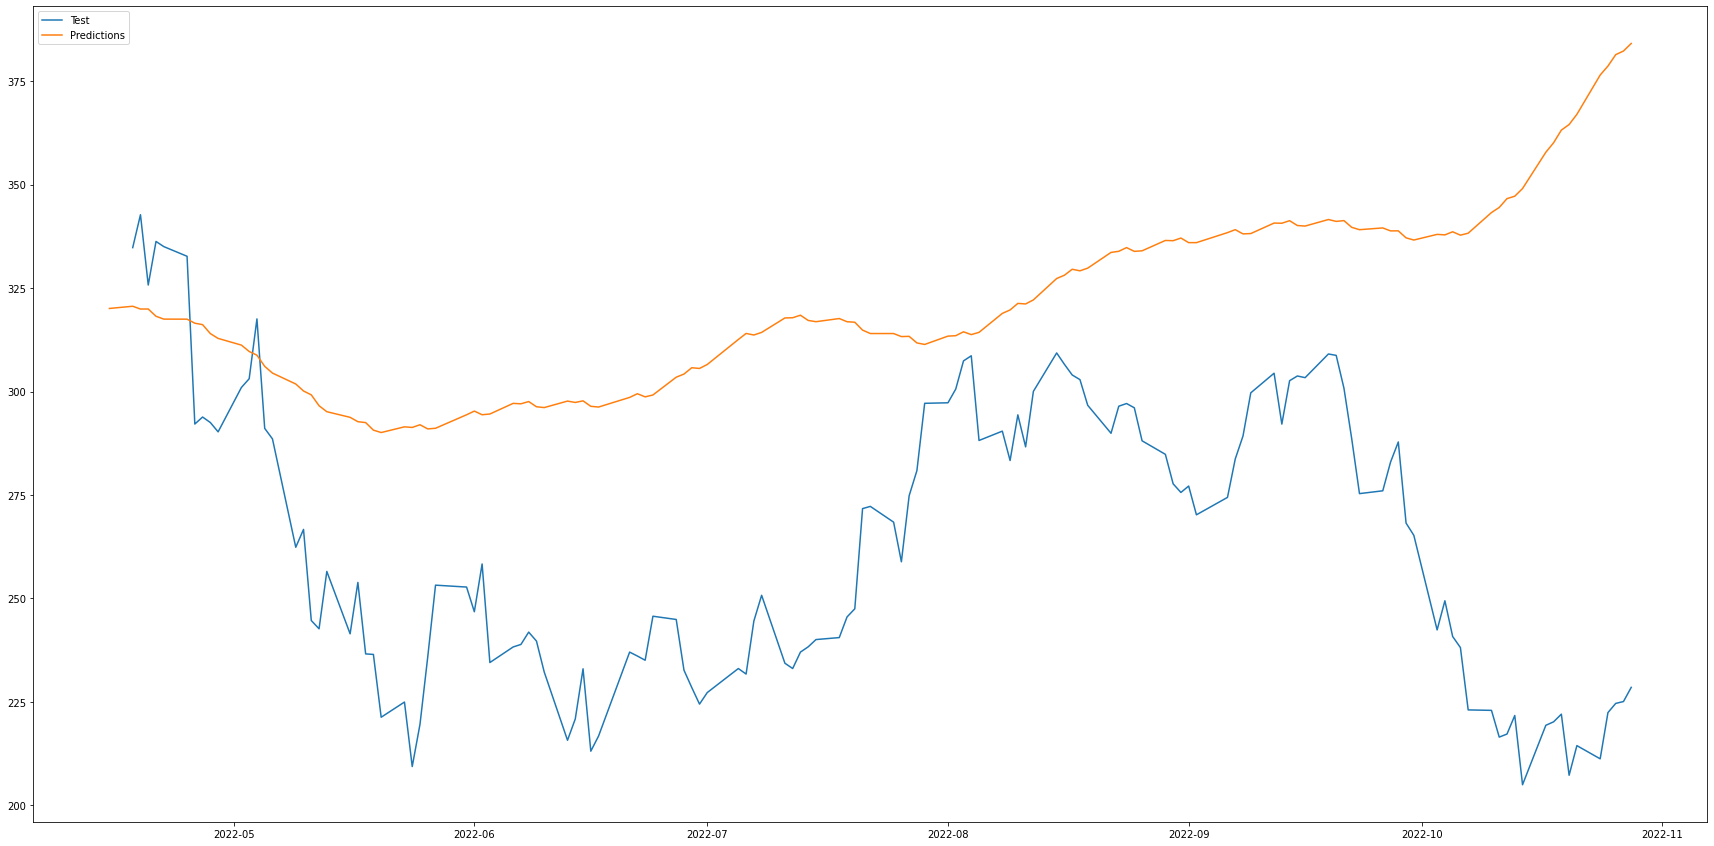

In [ ]:





plt.figure(figsize=(30,15))
#plt.plot(train, label='Training')

plt.plot(df1[df1['ds']>'2022-04-14']['y'], label='Test')
plt.plot(forecast1[forecast1['ds']>'2022-04-14']['yhat'], label='Predictions')

plt.legend()
plt.show()

Int64Index([649], dtype='int64')
Int64Index([664], dtype='int64')
Int64Index([674], dtype='int64')
Int64Index([719], dtype='int64')


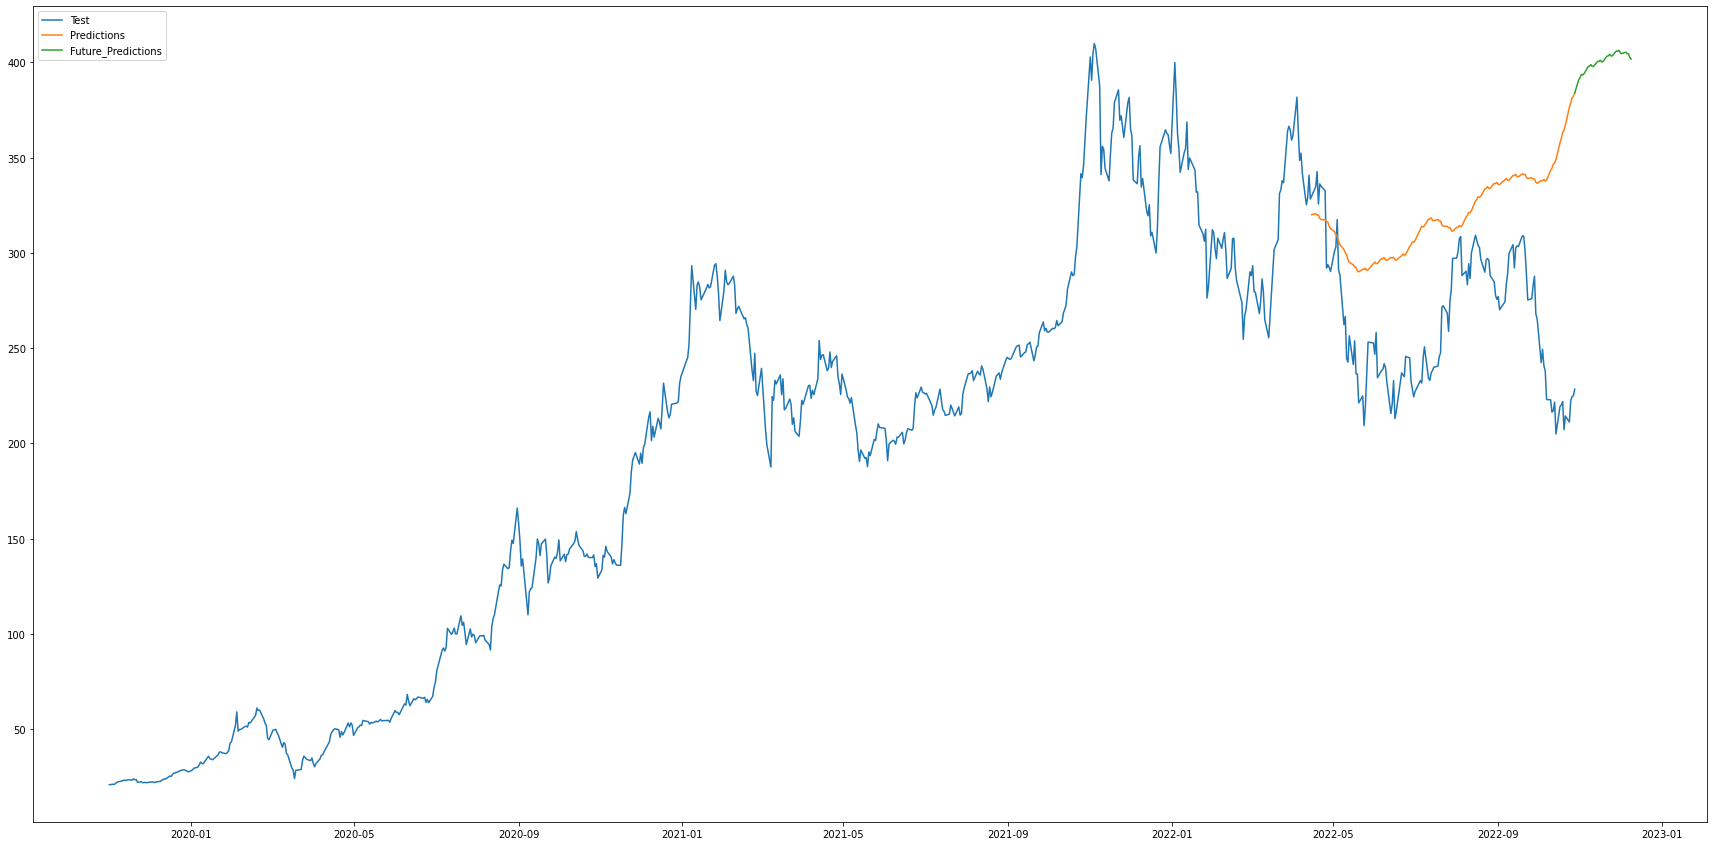

In [ ]:

future2 = prophet1.make_future_dataframe(periods=172, freq='B') # Add another 30 days 
forecast2 = prophet1.predict(future2)


# Need to drop ('2022-05-30','2022-06-20','2022-07-04','2022-09-05') Non-Trading day from Forecast2

print(forecast2[forecast2['ds']=='2022-05-30'].index)
print(forecast2[forecast2['ds']=='2022-06-20'].index)
print(forecast2[forecast2['ds']=='2022-07-04'].index)
print(forecast2[forecast2['ds']=='2022-09-05'].index)

forecast2=forecast2.drop([forecast.index[649],forecast.index[664],forecast.index[674],forecast.index[719]])

forecast1.index = forecast1['ds']
forecast2.index = forecast2['ds']


plt.figure(figsize=(30,15))
#plt.plot(train, label='Training')

plt.plot(df1['y'], label='Test')
plt.plot(forecast1[forecast1['ds']>'2022-04-14']['yhat'], label='Predictions')
plt.plot(forecast2[forecast2['ds']>'2022-10-27']['yhat'], label='Future_Predictions')
plt.legend()
plt.show()